# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Signal detection theory
### VIDEO: F-score
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
## run experiment

# number of 'trials' in the experiment
N = 50 # actual trials is 2N (so 100 trials total)

# number of experiment repetitions
numExps = 10000 # repeat the experiment 10 thousand times!

# initialize
Fscores     = np.zeros(numExps)
dPrimes     = np.zeros(numExps)
specificity = np.zeros(numExps)


### run the 10000 experiments
for expi in range(numExps):
    
    # these two add up to 50:
    H = np.random.randint(1,N)  # hits - random integer between 1 and 49
    M = N-H                     # misses (total N 50 minus the rand int b/w 1 and 49)
    
    # these two add up to 50:
    CR = np.random.randint(1,N) # correct rejections - rand int between 1 and 49
    FA = N-CR                   # false alarms - 50 minus the rand int
    
    # Fscore - save it for each run of the experimentation loop
    Fscores[expi] = H / (H+(FA+M)/2) # simple impl of the formula
    
    # specificity - similar to precision and accuracy
    # this is a normalized way of looking at correct rejections (divided by marginal of correct rejections and false alarms)
    # correctly saying no normalized across the column/margin of when the actual stimulus was really absent
    specificity[expi] = CR/(CR+FA)
    
    # d-prime - record for each experiment run
    dPrimes[expi] = stats.norm.ppf(H/N) - stats.norm.ppf(FA/N)
    
    
    # not used - just shown for demonstration of how to compute them easily here.
    precision = H/(H+FA)
    recall    = H/(H+M)


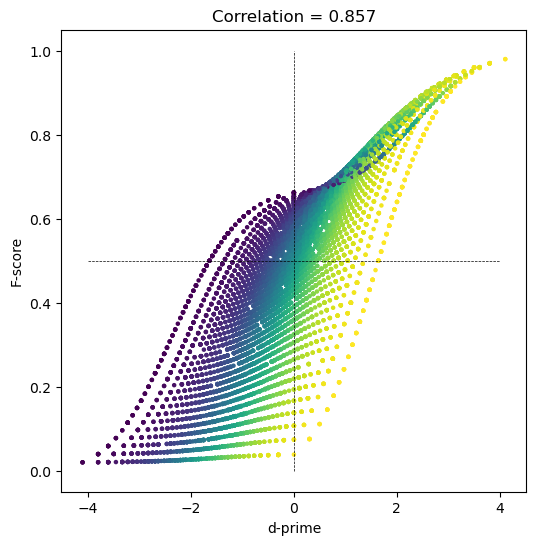

In [3]:
## See how d-prime and f-score relate to each other

# note the range of d-prime is -4 to 4
# the average is around zero where clustering occurs and that is expected because we're using random data, so across 10k experiments, the d-primes converge to 0
# on the y is f-score which range from 0 to 1
# The expected avg of f scores coverge around 0.5
# The correlation shows that d-prime and f-score are highly correlated linearly to each other 
# it appears that there are sigmoid (curved) shaped columns that relate f to d-prime according to some other variable

# The main obvious relationship is that as both get higher, that indicates better performance.


fig = plt.subplots(1,figsize=(6,6))

plt.scatter(dPrimes,Fscores,s=5,c=specificity) # c=specificity gives the color coding of the points, each col corresponds to a color
# deep purple color corresponds to very few correct rejections, going up to yellow corresponds to many correct rejections
# so the relationship between f and d-prime is not just 2 dimensional because of the way they normalize the variables in different ways.
plt.plot([-4,4],[.5,.5],'k--',linewidth=.5)
plt.plot([0,0],[0,1],'k--',linewidth=.5)
plt.xlabel('d-prime')
plt.ylabel('F-score')
plt.title('Correlation = %g' %np.round(np.corrcoef(Fscores,dPrimes)[1,0],3))

plt.show()